# Models and model fit
### The only equation you will ever need:
$$
data_i = model + error_i
$$

Today we will look at the simplest of all models, the _Constant Model_.

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Let's collect some data! 
How many hours per week do you spend on social media?

In [13]:
data = pd.read_csv("data.csv")
data = data['Poll Option']

In [14]:
data

0      2.3
1      1.5
2      3.0
3      1.0
4      8.0
5      5.0
6      3.0
7      4.0
8      7.0
9      2.5
10    18.0
11     2.0
12     6.0
13    25.0
14    10.0
Name: Poll Option, dtype: float64

Text(0, 0.5, 'values')

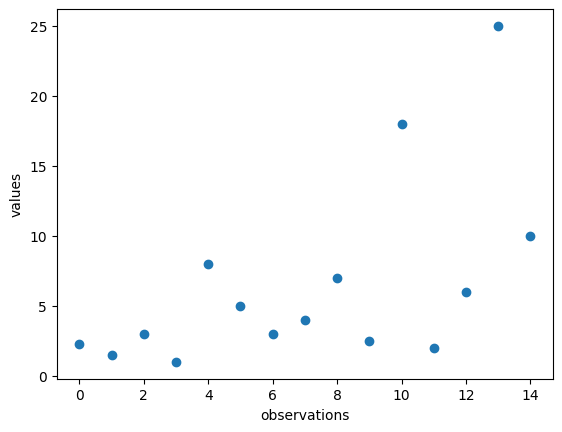

In [15]:
plt.plot(range(0,len(data)), data, 'o')
plt.xlabel('observations')
plt.ylabel('values')

## A Simple Statistical Model​
In statistics we fit models to our data (i.e. we use a statistical model to represent what is happening in the real world).​

The mean is a hypothetical value (i.e. it doesn’t have to be a value that actually exists in the data set).​

As such, the mean is simple statistical model.​

The mean in math notation:
$$\bar{X} = \frac{\sum_{i=1}^{n}{x_i}}{n}$$

In [16]:
# Make a function that calculates the mean of the 
def mymean(x):
    return np.mean(x)

Let's plot the mean on our original plot

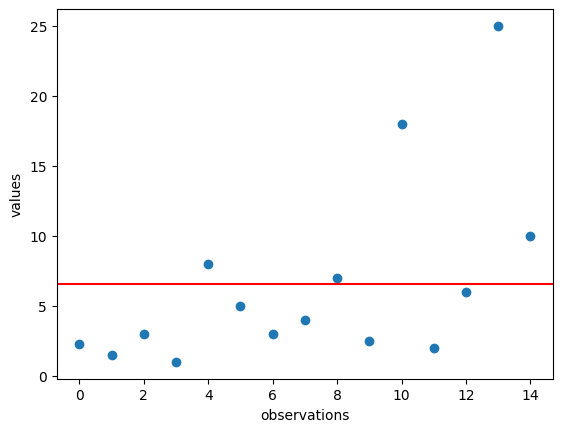

In [17]:
plt.plot(range(0,len(data)), data, 'o')
plt.xlabel('observations')
plt.ylabel('values')
mean_value = mymean(data)
plt.axhline(y=mean_value, color='r', linestyle='-')

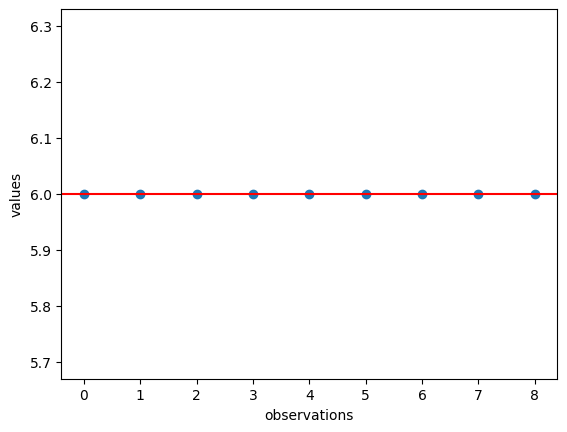

In [18]:
data = np.array([6,6,6,6,6,6,6,6,6])
plt.plot(range(0,len(data)), data, 'o')
plt.xlabel('observations')
plt.ylabel('values')
mean_value = mymean(data)
plt.axhline(y=mean_value, color='r', linestyle='-')

## Measuring the 'Fit' of the model
The mean is a model of what happens in the real world: the typical score.​

It is not a perfect representation of the data.​

Information is lost when condensing the full dataset into a single number (the mean)​

How can we assess how well the mean represents reality?​

### Deviation from the mean
A simple way to measure how well the mean represents the data is to calculate the _deviation from the mean_ for each observation.​

$$deviation = x_i - \bar{x}$$

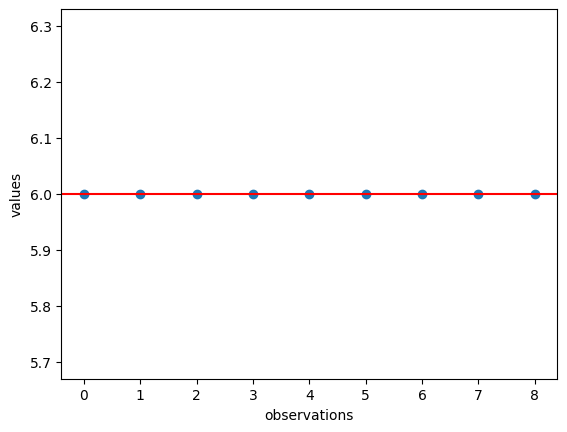

In [19]:
plt.plot(range(0,len(data)), data, 'o')
plt.xlabel('observations')
plt.ylabel('values')
plt.axhline(y=mean_value, color='r', linestyle='-')

deviations = []
for i in range(len(data)):
    plt.plot([i, i], [data[i], mean_value], color='gray', linestyle='--')
    deviations.append(data[i] - mean_value)

Intuitively, the deviations from the mean tells us how far each observation is from the mean.​ We could sum these deviations (the total length of the dotted lines) to get an overall measure of fit.​

In [20]:
# what is the total error of the model? 
np.sum(deviations)

np.float64(0.0)

### ✏️ Your turn
> 1. Get to this point in the notebook.​
> 2. Write a function `deviations()` that takes a data vector and outputs a vector of deviations
> 3. What is the problem with adding up the deviations?

### Sum of Squared Errors
As deviations from the mean always add up to zero, we use the sum of squared deviations as a measure of model error. 

Squared deviations, or the "sum of squares" (SS), in math notation:
$$
SS = \sum_i^n {(x_i - \bar{X})^2}
$$

In [15]:
# Define a function that calculates the sum of squared error
def squared_deviation(x):
    return 

# apply the squared_deviation function to the deviations in the data
squared_deviation(data)


Great! Now, we have a number that represents the deviations of the data from our (constant) model. 

### ✏️ Your turn
> 1. Get up to speed with the code
> 2. What's the problem with the sum of squared errors? 

### Variance
The sum of squares is a good measure of overall variability, but is dependent on the number of scores.​

We could calculate the _average_ variability by dividing by the number of scores (n).​

This value is called the _variance_ and it is often represented with the symbold $s^2$:
$$
s^2 = \frac{SS}{N}
$$​

In [16]:
# calculate a function called myvariance that computes the variance of the data
def myvariance(x):
    return 

# calculate the variance of the data
myvariance(data)

### The standard deviation
However, also the variance has one problem: it is measured in units squared.​

This isn’t a very meaningful metric so we take the square root value.​

This is the standard deviation (s):
$$
s = \sqrt{s^2} = \sqrt{\frac{\sum_{i=1}^n{(x_i-\bar{x})^2}}{n}}
$$

### ✏️ Your turn
> Complete the code below. Challenge yourself not to look back at the code you have already written. Try to think through the logical steps to reach your goal: Compute a measure of error that is meaningful (e.g. is proportional to how well the model represents the data), is invariant to the size of your data and is interpretable. 

In [38]:
# define a function that calculates the standard deviation of the data
def mystd(x):
    # calculate the deviations from the mean
    devs = ...
    # calculate the squares of the deviations
    sq_devs = ...
    # sum the squared deviations
    ss = ...
    # compute the average squared error
    s2 = ...
    # take its square root
    std = ...

    return std

# Apply your function to the data


# Validate your function against standard packages


#### Important things to remember

The sum of squares, variance, and standard deviation represent the same thing:​

- The ‘fit’ of the mean to the data​

- The variability in the data​

- How well the mean represents the observed data​, i.e. an error​

In [39]:
# simulate two datasets with different variances
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 3, 1000)

#### Which of these two distributions are better represented by the mean?

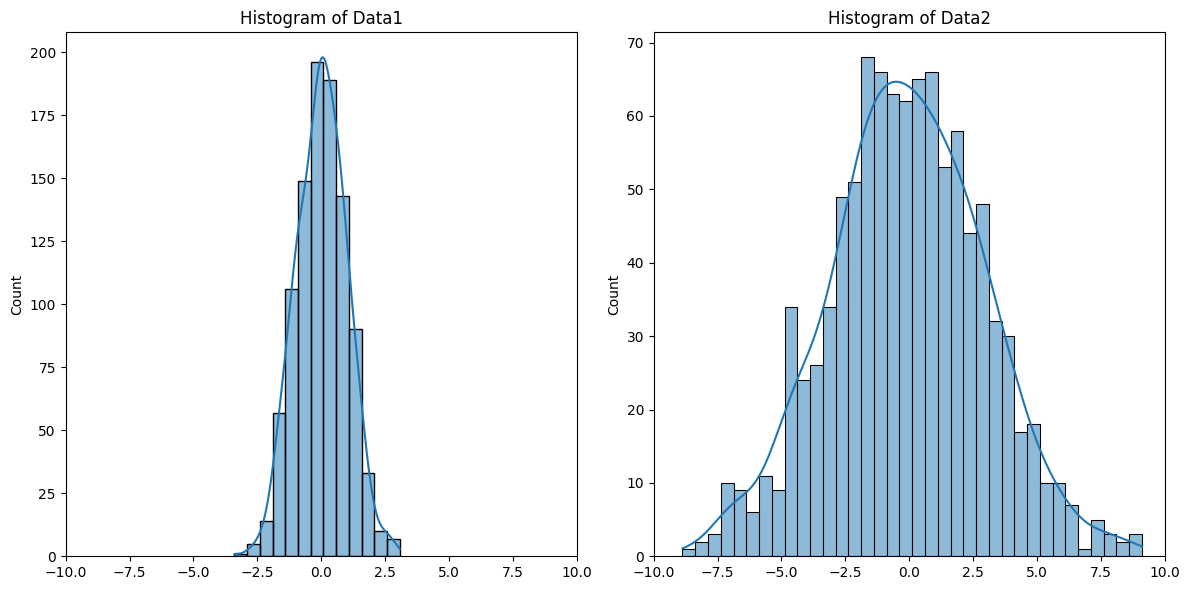

In [40]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram
sns.histplot(data1, kde=True, ax=axes[0], binwidth=0.5)
axes[0].set_title('Histogram of Data1')

# Plot the second histogram
sns.histplot(data2, kde=True, ax=axes[1], binwidth=0.5)
axes[1].set_title('Histogram of Data2')

# Ensure the y-axis limits are the same for both plots
axes[0].set_xlim(-10, 10)
axes[1].set_xlim(-10, 10)


# Show the plot
plt.tight_layout()
plt.show()

## Why did we use the mean?
In the example above, we chose the mean as our constant model. However, we could have chosen any other value to represent the data **y**. In machine learning, we often represent any model by the symbol $ \theta $ (theta). When you see $ \theta $, read "my model's parameter(s)". In the constant model above, $ \theta $ is a single number, the mean. 

Similarly, in the above example we chose the sum of squared deviations (SS) as our measure of total model error. However, SS is only a type of *loss function*---a function that measures how far away our constant ($ \theta $) is from the actual data **y**. 

A loss function is a mathematical function that takes in $\theta$ and a data value $y$. It outputs a single number, the *loss*, that
measures how far away $\theta$ is from $y$. We write the loss function as: 
$$
{\cal l}(\theta, y)
$$

By convention, the loss function outputs lower values for better values of
$\theta$ and larger values for worse $\theta$. To fit a constant to our data, we
select the particular $\theta$ that produces the lowest average loss across all
choices for $ \theta $. In other words, we find the $\theta$ that *minimizes the average
loss* for our data, $y_1, \ldots, y_n$. More formally, we write the average loss as $L(\theta, y_1, y_2, \ldots, y_n)$, where:

$$
\begin{aligned}
L(\theta, y_1, y_2, \ldots, y_n)
&= \text{mean}\left\{ {\cal l}(\theta, y_1),
      {\cal l}(\theta, y_2), \ldots,
      {\cal l}(\theta, y_n) \right\} \\
&= \frac{1}{n} \sum_{i = 1}^{n} {\cal l}(\theta, y_i)\\
\end{aligned}
$$


As a shorthand, we often use the vector $ \mathbf{y} = [ y_1, y_2, \ldots, y_n ] $.
Then we can write the average loss as:

$$
L(\theta, \mathbf{y})
= \frac{1}{n} \sum_{i = 1}^{n}{\cal l}(\theta, {y_i})\\
$$


Notice that ${\cal l}(\theta, y)$ tells us the model's loss for a single data point while $ L(\theta, \mathbf{y}) $ gives the model's average
loss for all the data points. The capital $L$ helps us remember that the average loss combines multiple smaller $\cal l$ values.

Once we define a loss function, we can find the value of $\theta$ that produces
the smallest average loss. We call this minimizing value $\hat{\theta}$. In other words, of all the possible $\theta$ values,
$\hat{\theta}$ is the one that produces the smallest average loss for our data.
We call this optimization process *model fitting*; it finds the best constant model for our data.

In [41]:
def mse_loss(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

Text(0, 0.5, 'MSE Loss')

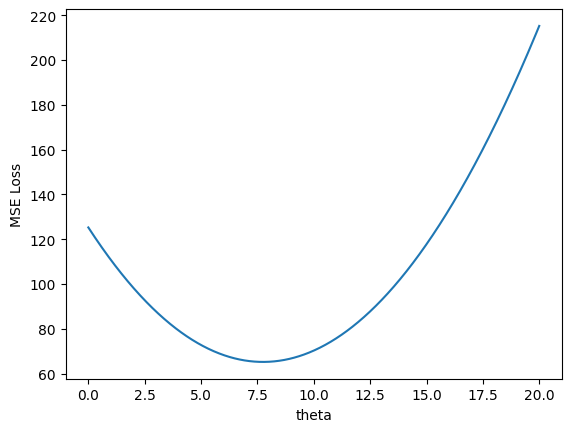

In [ ]:
theta_vals = np.linspace(min(data), max(data), 1000)
loss_vals = []
for p in theta_vals:
    loss_vals.append(mse_loss(p, data))

plt.plot(theta_vals, loss_vals)
plt.xlabel('theta')
plt.ylabel('MSE Loss')
    

In [47]:
# reproduce the plot above and add on top the mean of the data as a red vertical line
...

What do you see?